<a href="https://colab.research.google.com/github/SreeDurga28/GRIPTasks/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Using Decision Tree

**Author : Sree Krishna Durga K M**

**Task Explanation:**

*   Create the Decision Tree classifier and visualize it graphically.

*   The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
*   Use R or Python to perform this task



**Importing the libraries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

**Loading the data from Scikit learn library**

In [2]:
iris = datasets.load_iris()
numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))
print("Data loaded")

150
4
['setosa', 'versicolor', 'virginica']
Data loaded


So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 features here, and three distinct Iris species that each flower is classified into.

In [12]:
 iris_df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
#checking if there are Ny null values in the dataset to clean the data
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

**Data visualization**

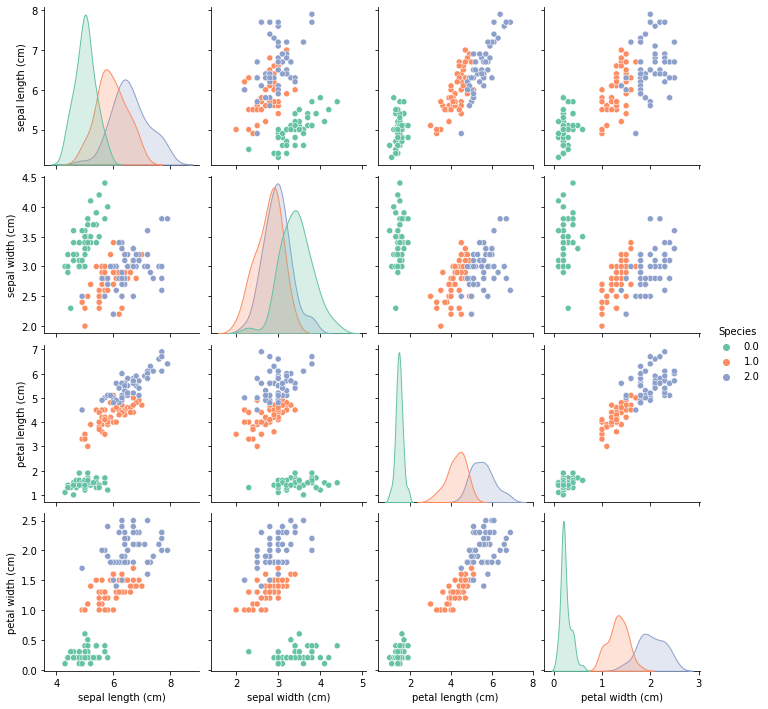

In [5]:
sns.pairplot(data=iris_df,hue="Species",palette="Set2")
plt.show()

**Assigning variables**

In [6]:
X=iris_df.drop(['Species'], axis = 1)
y=iris_df['Species']

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# 70% training and 30% test
print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(105, 4) (45, 4) (105,) (45,)


**Building a Decision Tree model**

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
 
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluating the model**

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


 **Visualization of Decision Tree**

export_graphviz function is used to display the tree within a notebook. It converts decision tree classifier into dot file and pydotplus convert this dot file to png format.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


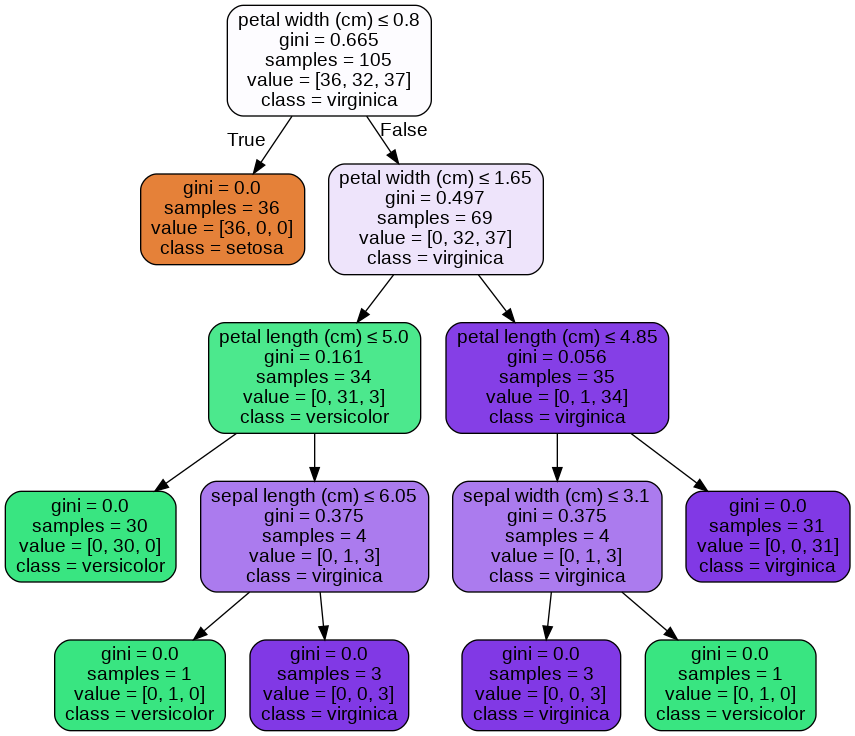

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris['feature_names'],class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())